# Day 08. Exercise 04
# Regression

## 0. Imports

In [60]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [24]:
df=pd.read_csv('../data/checker_regression.csv')

In [25]:
df.fillna(0,inplace=True)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [32]:
codes, uniques=pd.factorize(df['uid'])
df['uid_codes']=codes
df

,uid,num_commits,pageviews,AVG(diff),uid_codes
0,user_1,62,28.0,0.00,0
1,user_1,62,28.0,0.00,0
2,user_1,62,28.0,0.00,0
3,user_1,62,28.0,0.00,0
4,user_1,62,28.0,0.00,0
...,...,...,...,...,...
72,user_31,128,0.0,-104.75,24
73,user_4,40,0.0,-175.60,25
74,user_6,15,0.0,-62.60,26
75,user_7,8,0.0,-115.50,27


In [33]:
X=df[['num_commits','pageviews', 'uid_codes']]
y=df['AVG(diff)']

In [40]:
X.head()

,num_commits,pageviews,uid_codes
0,62,28.0,0
1,62,28.0,0
2,62,28.0,0
3,62,28.0,0
4,62,28.0,0


In [39]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.40686446, -0.47615738, -1.5444261 ],
       [ 0.40686446, -0.47615738, -1.5444261 ],
       [ 0.40686446, -0.47615738, -1.5444261 ],
       [ 0.40686446, -0.47615738, -1.5444261 ],
       [ 0.40686446, -0.47615738, -1.5444261 ],
       [ 0.40686446, -0.47615738, -1.5444261 ],
       [-0.97964731,  0.17645751, -1.42207959],
       [-0.97964731,  0.17645751, -1.42207959],
       [-0.97964731,  0.17645751, -1.42207959],
       [-0.97964731,  0.17645751, -1.42207959],
       [-0.97964731,  0.17645751, -1.42207959],
       [-0.97964731,  0.17645751, -1.42207959],
       [-1.40880572, -0.77571832, -1.29973308],
       [ 1.19915691, -0.77571832, -1.17738657],
       [ 0.07674261, -0.77571832, -1.05504005],
       [ 0.37385228,  0.75418217, -0.93269354],
       [ 0.37385228,  0.75418217, -0.93269354],
       [ 0.37385228,  0.75418217, -0.93269354],
       [ 0.37385228,  0.75418217, -0.93269354],
       [-0.88061076, -0.77571832, -0.81034703],
       [-0.28639142, -0.77571832, -0.688

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [57]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    rmse_list = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        rmse_train = mean_squared_error(y_train, y_pred_train)
        rmse_test = mean_squared_error(y_test, y_pred_test)

        rmse_list.append(rmse_test)

        print(f"train - {rmse_train:<20} |   test - {rmse_test}")

    print(f"Average RMSE on crossval is {np.mean(rmse_list)}")

# Linear

In [72]:
linear = LinearRegression()
crossval(10, X_scaled, y, linear)

train - 1441.1429446615782   |   test - 4363.822385412787
train - 1785.9386282352104   |   test - 1328.019337809866
train - 1907.1374456640067   |   test - 270.2825181651495
train - 1594.793938146093    |   test - 3172.826687369628
train - 1761.9879544494338   |   test - 1524.044664138978
train - 1891.2205046752322   |   test - 428.980245315449
train - 1671.5311914343833   |   test - 2656.145908579817
train - 1884.464701069143    |   test - 262.9704748582953
train - 1719.5519955218504   |   test - 2169.516974752502
train - 1570.7543918892582   |   test - 3740.0850633468194
Average RMSE on crossval is 1991.6694259749293


# TreeRegressor

In [70]:
tree = DecisionTreeRegressor(max_depth=4, random_state=21)
crossval(10, X_scaled, y, tree)

train - 158.99594202898547   |   test - 4577.8275
train - 240.4017901234568    |   test - 205.03125
train - 242.75162909286098   |   test - 0.0
train - 172.351384057971     |   test - 411.8450000000001
train - 69.83359366612989    |   test - 3562.23092978395
train - 120.46939881910895   |   test - 30.03125
train - 57.94242351046698    |   test - 785.4955902777779
train - 95.23041058201058    |   test - 2059.543557142857
train - 38.312878968253976   |   test - 4988.421785714286
train - 197.8225373677249    |   test - 687.179129464286
Average RMSE on crossval is 1730.7605992383155


# ForestRegressor

In [71]:
forest = RandomForestRegressor(random_state=21)
crossval(10, X_scaled, y, forest)

train - 105.78368795611917   |   test - 3319.0074774444456
train - 153.5900635692432    |   test - 189.68001068055574
train - 157.03564593880856   |   test - 0.0
train - 176.05050118115886   |   test - 700.0970170138893
train - 156.78533707206097   |   test - 2375.898122795144
train - 185.6872019730269    |   test - 680.3622719999996
train - 177.41081999838968   |   test - 1392.2432888888893
train - 156.0644039753964    |   test - 1555.113175000001
train - 186.55295501230148   |   test - 1454.162019706348
train - 162.5019098880949    |   test - 921.4205880714262
Average RMSE on crossval is 1258.7983971600697


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [75]:
y_pred_linear = linear.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_forest = forest.predict(X_test)

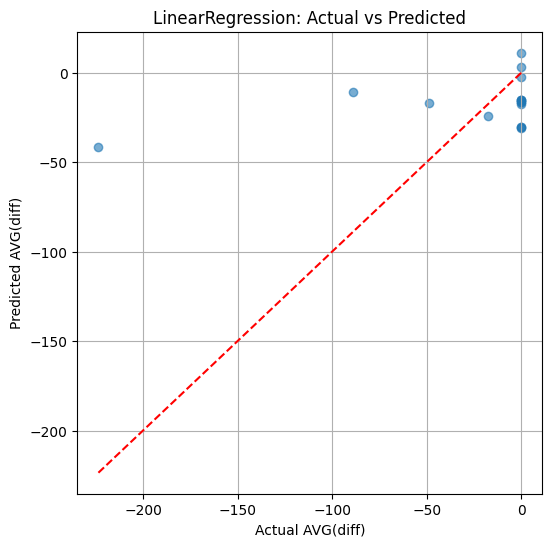

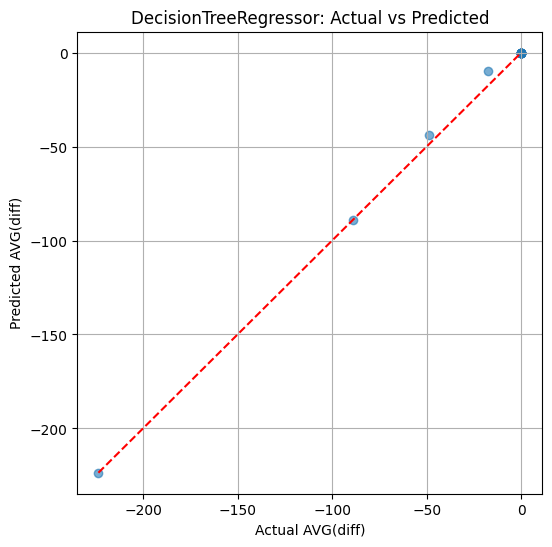

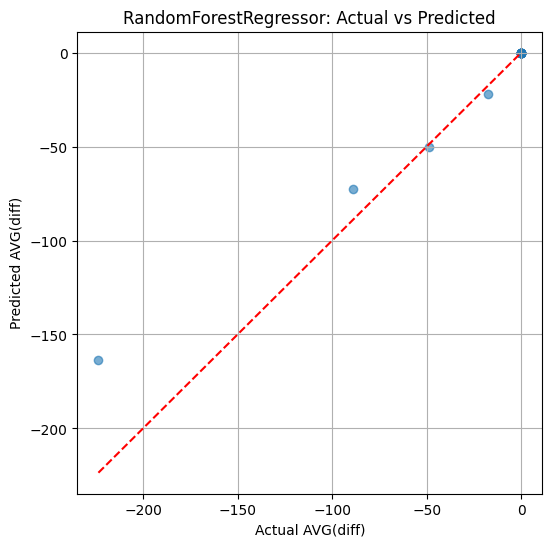

In [76]:
import matplotlib.pyplot as plt

models = {
    "LinearRegression": y_pred_linear,
    "DecisionTreeRegressor": y_pred_tree,
    "RandomForestRegressor": y_pred_forest
}

for model_name, y_pred in models.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual AVG(diff)")
    plt.ylabel("Predicted AVG(diff)")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # линия идеала
    plt.grid(True)
    plt.show()

# В идеальном графике точки должны максимально близко стоять к линии регресии, это происходит когда значение предсказаний максимально близка к реали. 